In [2]:
import pandas as pd

df = pd.read_excel("Concrete_Data.xls")

new_col = []
for col in df.columns:
    new_col.append(col.split(" (")[0].replace(" ", ""))
    
df.columns = new_col

df.sort_values(by="Concretecompressivestrength", ascending=False).head()

,Cement,BlastFurnaceSlag,FlyAsh,Water,Superplasticizer,CoarseAggregate,FineAggregate,Age,Concretecompressivestrength
181,389.9,189.0,0.0,145.9,22.0,944.7,755.8,91,82.599225
381,315.0,137.0,0.0,145.0,5.9,1130.0,745.0,28,81.751169
153,323.7,282.8,0.0,183.8,10.3,942.7,659.9,56,80.199848
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
159,389.9,189.0,0.0,145.9,22.0,944.7,755.8,56,79.400056


In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X = df.drop(["Concretecompressivestrength"], axis=1)
y = df["Concretecompressivestrength"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [35]:
# fit model no training data
model = RandomForestRegressor(n_estimators = 90, random_state=42, max_depth = 20, min_samples_split=2)
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=20,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=90, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [47]:
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV
from time import time

clf = RandomForestRegressor(n_estimators=100)

# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")


# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(2, 8),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["mse"]}

# run randomized search
n_iter_search = 200
random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
                                   n_iter=n_iter_search)

start = time()
random_search.fit(X, y)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 69.22 seconds for 200 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.530 (std: 0.328)
Parameters: {'bootstrap': False, 'criterion': 'mse', 'max_depth': None, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}

Model with rank: 2
Mean validation score: 0.515 (std: 0.318)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 1, 'min_samples_split': 4}

Model with rank: 3
Mean validation score: 0.514 (std: 0.285)
Parameters: {'bootstrap': True, 'criterion': 'mse', 'max_depth': None, 'max_features': 2, 'min_samples_leaf': 2, 'min_samples_split': 4}



In [52]:
model = RandomForestRegressor(bootstrap=False, criterion='mse', max_depth= None, max_features=3, min_samples_leaf=1, min_samples_split=2)
model.fit(X_train.values, y_train.values)

RandomForestRegressor(bootstrap=False, criterion='mse', max_depth=None,
           max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

model = GradientBoostingRegressor()

model.fit(X_train.values, y_train.values)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_split=1e-07,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, n_estimators=100,
             presort='auto', random_state=None, subsample=1.0, verbose=0,
             warm_start=False)

In [53]:
model.score(X_test.values, y_test.values)

0.88481755646415539

In [54]:
model.feature_importances_

array([ 0.25082461,  0.06090184,  0.04214475,  0.14462314,  0.05096697,
        0.05753895,  0.04635204,  0.3466477 ])

In [55]:
from evolutionary_search import maximize
import numpy as np

new_col

['Cement',
 'BlastFurnaceSlag',
 'FlyAsh',
 'Water',
 'Superplasticizer',
 'CoarseAggregate',
 'FineAggregate',
 'Age',
 'Concretecompressivestrength']

In [56]:
def eval_mix(Cement, BlastFurnaceSlag, FlyAsh, Water, 
         Superplasticizer, CoarseAggregate, FineAggregate, Age, model):
    
    x = np.asarray([Cement, BlastFurnaceSlag, FlyAsh, Water, 
         Superplasticizer, CoarseAggregate, FineAggregate, Age]).reshape(-1, 8)
    print(x)
    return model.predict(x)[0]


param_grid = {}

for col in X_train.columns:
    param_grid[col] = np.arange(int(df[col].min()), int(df[col].max()+20))

param_grid["Age"] = [28]
# param_grid

Extra parameters found on https://github.com/yama1968/Spikes/blob/8f41c86085b6714fed0ef6ef9195005cfa7bbbe7/mxnet/deap_lenet.ipynb

In [57]:
args = {"model": model}

best_params, best_score, score_results, hist, logs = maximize(eval_mix, param_grid, 
                                                              args, 
                                                              verbose=False,
                                                              population_size=100,
                                                              gene_mutation_prob=0.2,
                                                              gene_crossover_prob=0.7,
                                                              tournament_size=10,
                                                              generations_number=100)

/home/dexter/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMax' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/home/dexter/anaconda3/lib/python3.6/site-packages/deap/creator.py:141: RuntimeWarning: A class named 'Individual' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


[[160   2 201 185  28 801 985  28]]
[[ 401   64  129  188   13 1163 1004   28]]
[[ 325  303  127  173    6 1045  955   28]]
[[232 308 106 194  37 878 798  28]]
[[517 316 113 129  31 843 607  28]]
[[172 275  23 156   8 872 642  28]]
[[373 105  61 216  29 894 992  28]]
[[119  64  94 260  24 868 987  28]]
[[ 131  229  139  145   29 1060  769   28]]
[[ 294  215   53  199   25 1050  739   28]]
[[ 144   77  194  216    4 1037  703   28]]
[[ 125  297   22  123   39 1099  736   28]]
[[ 232   86   80  145   30  824 1002   28]]
[[396  90  90 228  36 969 827  28]]
[[176 214   0 163   4 974 595  28]]
[[ 291  231  107  198   32 1032  720   28]]
[[321 275 176 152   0 855 791  28]]
[[ 124  123  208  174   20 1148  851   28]]
[[451 280 110 247  45 851 970  28]]
[[ 197  306    9  148    0 1127  762   28]]
[[332 326 150 123   9 801 850  28]]
[[274  97  35 122  14 948 884  28]]
[[ 111   31  150  211   51 1158  602   28]]
[[452 113  60 128  30 962 938  28]]
[[ 182   63   39  144    4  999 1004   28]]
[[ 1

In [58]:
best_score

78.25828390400001

In [59]:
best_params

{'Age': 28,
 'BlastFurnaceSlag': 179,
 'Cement': 535,
 'CoarseAggregate': 1043,
 'FineAggregate': 749,
 'FlyAsh': 9,
 'Superplasticizer': 0,
 'Water': 148}

In [60]:
top_params = list(best_params.values())[:-1]
top_params

ages = []
cpa = []

for i in range(42):
    ages.append(i)
    cpa.append(model.predict(top_params + [i])[0])

/home/dexter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dexter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/dexter/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single s

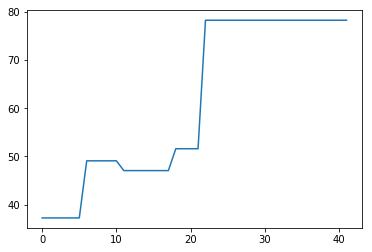

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ages, cpa)
plt.show()